In [86]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import struct
import socket
import codecs
import time
import matplotlib.pyplot as plt
import pylab
import random
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import time
import random
import cmath
import pygame
from pygame import mixer
import math
import statistics

In [92]:
UDP_IP = "192.168.10.155"
UDP_PORT = 1087

sock = socket.socket(socket.AF_INET,  # Internet
                    socket.SOCK_DGRAM)  # UDP
sock.bind((UDP_IP, UDP_PORT))

In [93]:
def assembleData(x):
    out1,out2,out3,out4 = [],[],[],[]
    for i in x:
        out1 += [i[0]]
        out2 += [i[1]]
        out3 += [i[2]]
        out4 += [i[3]]
    return(out1,out2,out3,out4)

    # TP9 - Left ear
    # AF7 - Left forehead
    # AF8 - Right forehead
    # TP10 - Right ear
    # AUXR - Right Auxiliary (MU-02 only
    
    # ds = chirp_seq(TP9,4000,[38])
    # ds = chirp_seq(TP9,4000,[40])

In [94]:
def chirp_seq(x,cuts,seq):
    lis = []
    
    sin_1 = []
    for dd in range(len(seq)):
        if seq[dd] == 0:
            sin_1 += [0 for ss in np.arange(dd*cuts,(dd+1)*cuts)]
        else:
            sin_1 += [(1j*np.sin((seq[dd]/256)*2*np.pi*jj) + np.cos((seq[dd]/256)*2*np.pi*jj)) for jj in np.arange(dd*cuts,(dd+1)*cuts)]

    toolbar_width = 10
    sys.stdout.write("[%s]" % ("" * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1))
        
    count = 0
    nu = 1
    
    for r in range(len(x)-cuts*len(seq)):
        lis += [np.abs(np.dot(sin_1,x[(r):(len(sin_1)+r)]))]
        count += 1
        
        if count == nu*(len(x)//20):
            nu += 1
            sys.stdout.write("#")
            sys.stdout.flush()
        
    return(lis)

In [95]:
def ctvepNoise(rot,times,name):
    out = []
    
    for i in range(times):
        out_1 = []
        
        for i in range(4):
            count = 0
            final = []
            nu = 1

            toolbar_width = 10
            sys.stdout.write("[%s]" % ("" * toolbar_width))
            sys.stdout.flush()
            sys.stdout.write("\b" * (toolbar_width+1))

            while count < rot:
                data, addr = sock.recvfrom(1024) # buffer size is 1024 bytes

                if name in str(data):
                    st = data
                    st = st[-24:]
                    S = struct.unpack('>'+('f' * 6), st)

                    final += [S]
                    count += 1

                    if count == nu*(rot//20):
                        sys.stdout.write("#")
                        sys.stdout.flush()
                        nu += 1

            sys.stdout.write("]\n")  
            out_1 += final
            #time.sleep(3)
            
        sys.stdout.write("\n")
        out += out_1
    return(assembleData(out))

In [112]:
num = 256*10
rot = 4
name = "/eeg"

# Volume = 2 above middle-right side

TP9,AF7,AF8,TP10 = ctvepNoise(num,rot,name)

[####################]
[####################]
[####################]
[####################]

[####################]
[####################]
[####################]
[####################]

[####################]
[####################]
[####################]
[####################]

[####################]
[####################]
[####################]
[####################]



In [113]:
def FlowState(x,tim):
    sec = len(x)//256
    dss = []
    for n in range(sec):
        dss += [x[n*256:(n+1)*256]]

    outputs = []
    for i in range(len(dss)-tim):
        dd = []
        for w in range(256):
            dd += [d[w] for d in dss[i:tim+i]]
        bbb = plt.psd(dd,Fs=256,sides="onesided")[0]
        outputs += [np.dot(bbb[7:13],bbb[13:19])]
    return(outputs)

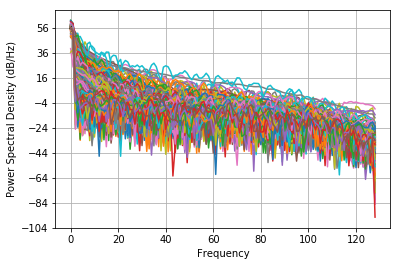

In [127]:
dss1 = FlowState(TP9,1)
dss2 = FlowState(AF7,1)
dss3 = FlowState(AF8,1)
dss4 = FlowState(TP10,1)

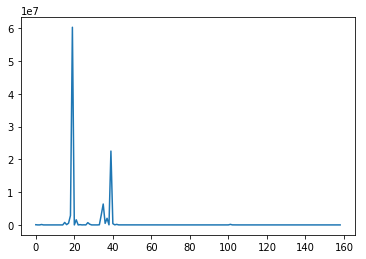

In [128]:
aa = [(dss1[i]+dss2[i]+dss3[i]+dss4[i])/4 for i in range(len(dss1))]
plt.plot([i for i in range(len(aa))],aa)